<a href="https://colab.research.google.com/github/yoonhyun123/practice/blob/main/%EB%8C%80%EC%A0%84%EC%A7%80%ED%95%98%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time

warnings.filterwarnings('ignore')

# 파일 경로 설정
path = '/content/대전대평(암반)'

# 파일 목록 가져오기
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
print("엑셀 파일 목록:", file_list_py)

# 데이터프레임 초기화
df = pd.DataFrame()

# 파일 병합
for i in file_list_py:
    # 경로 조합
    full_path = os.path.join(path, i)
    print(f"읽는 중: {full_path}")  # 확인용 출력
    data = pd.read_excel(full_path)
    df = pd.concat([df, data], ignore_index=True)  # 인덱스 무시하여 병합

# 결과 출력
print("\n결합된 데이터프레임:")
print(df)


엑셀 파일 목록: ['2012_hr.xlsx', '2016_hr.xlsx', '2009_hr.xlsx', '2014_hr.xlsx', '2010_hr.xlsx', '2011_hr.xlsx', '2013_hr.xlsx', '2015_hr.xlsx']
읽는 중: /content/대전대평(암반)/2012_hr.xlsx
읽는 중: /content/대전대평(암반)/2016_hr.xlsx
읽는 중: /content/대전대평(암반)/2009_hr.xlsx
읽는 중: /content/대전대평(암반)/2014_hr.xlsx
읽는 중: /content/대전대평(암반)/2010_hr.xlsx
읽는 중: /content/대전대평(암반)/2011_hr.xlsx
읽는 중: /content/대전대평(암반)/2013_hr.xlsx
읽는 중: /content/대전대평(암반)/2015_hr.xlsx

결합된 데이터프레임:
        관측소    구분        날짜  시간  수온(℃)  수위(el.m)  EC(㎲/㎝)
0      대전태평  (암반)  20120101   0   16.3     44.31      764
1      대전태평  (암반)  20120101   1   16.3     44.31      764
2      대전태평  (암반)  20120101   2   16.3     44.31      764
3      대전태평  (암반)  20120101   3   16.3     44.31      764
4      대전태평  (암반)  20120101   4   16.3     44.31      764
...     ...   ...       ...  ..    ...       ...      ...
69543  대전태평  (암반)  20151231  19   16.1     44.42      723
69544  대전태평  (암반)  20151231  20   16.1     44.42      723
69545  대전태평  (암반)  20151231  2

In [9]:
df = df.reset_index(drop=True)
df
df.info( )

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20120101,0,16.3,44.31,764
1,대전태평,(암반),20120101,1,16.3,44.31,764
2,대전태평,(암반),20120101,2,16.3,44.31,764
3,대전태평,(암반),20120101,3,16.3,44.31,764
4,대전태평,(암반),20120101,4,16.3,44.31,764
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20151231,19,16.1,44.42,723
69544,대전태평,(암반),20151231,20,16.1,44.42,723
69545,대전태평,(암반),20151231,21,16.1,44.42,723
69546,대전태평,(암반),20151231,22,16.1,44.42,723


In [10]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [13]:
df['Date'] = pd.to_datetime(df['날짜'], format='%Y%m%d') + \
             pd.to_timedelta(df['시간'].astype(int), unit='h')
df.set_index(df['Date'], inplace=True)
df.head(3)


,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2012-01-01 00:00:00,대전태평,(암반),20120101,0,16.3,44.31,764,2012-01-01 00:00:00
2012-01-01 01:00:00,대전태평,(암반),20120101,1,16.3,44.31,764,2012-01-01 01:00:00
2012-01-01 02:00:00,대전태평,(암반),20120101,2,16.3,44.31,764,2012-01-01 02:00:00


In [14]:
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head(3)

,temp,level,EC
Date,,,
2012-01-01 00:00:00,16.3,44.31,764
2012-01-01 01:00:00,16.3,44.31,764
2012-01-01 02:00:00,16.3,44.31,764


In [15]:
df1.isnull( ).sum( )

,0
temp,0
level,0
EC,0


In [16]:
df1.to_csv('./대전지하수.csv', encoding='cp949')

In [17]:
df = pd.read_csv('./대전지하수.csv', index_col='Date', parse_dates=True,
encoding='cp949')
df.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


from matplotlib import pyplot as plt
_df_0['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['level'].plot(kind='hist', bins=20, title='level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['EC'].plot(kind='hist', bins=20, title='EC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='temp', y='level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='level', y='EC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['level'].plot(kind='line', figsize=(8, 4), title='level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['EC'].plot(kind='line', figsize=(8, 4), title='EC')
plt.gca().spines[['top', 'right']].set_visible(False)

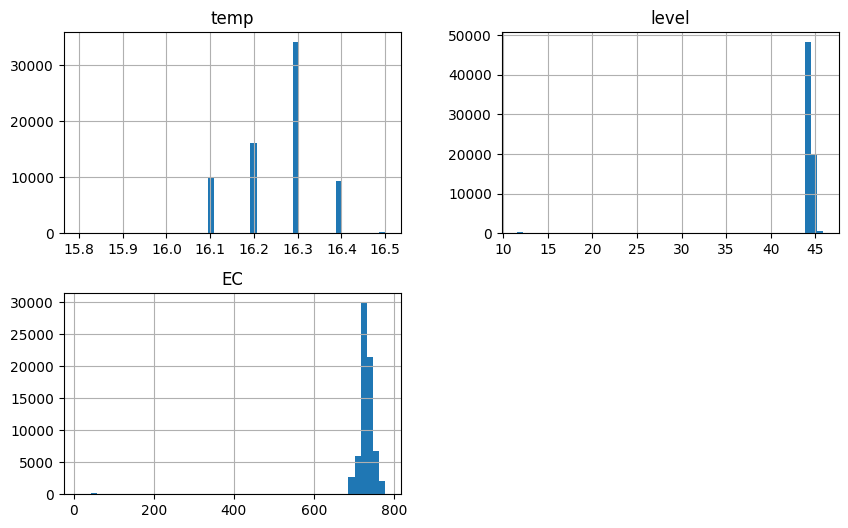

In [18]:
df.hist(bins=50, figsize=(10,6))
plt.show()

<Axes: >

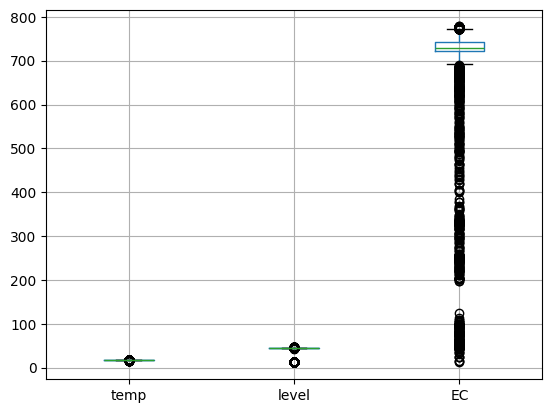

In [19]:
df.boxplot( )

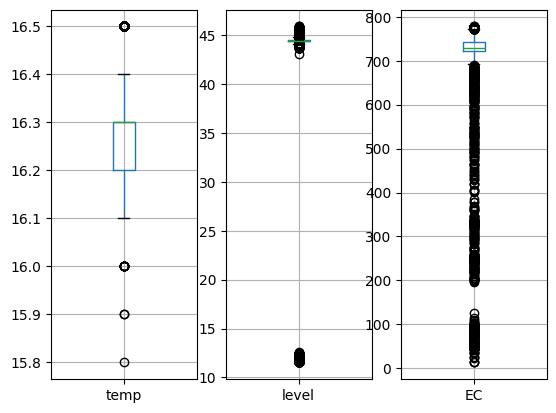

In [20]:
plt.subplot(1, 3, 1)
df.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df.boxplot(column='EC', return_type='both')
plt.show( )

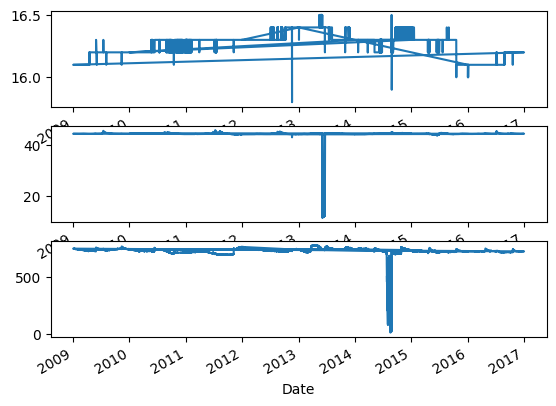

In [21]:
plt.subplot(3, 1, 1)
df['temp'].plot( )
plt.subplot(3, 1, 2)
df['level'].plot()
plt.subplot(3, 1, 3)
df['EC'].plot( )
plt.show( )

In [22]:
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)

0.17999999999999972


In [23]:
upper_level = q3_level + 1.5 * iqr_level
lower_level = q1_level - 1.5 * iqr_level
print(upper_level, '/', lower_level)
print((df['level'] > upper_level).sum( ))
print((df['level'] < lower_level).sum( ))

44.81999999999999 / 44.099999999999994
4492
1273


<Axes: xlabel='Date'>

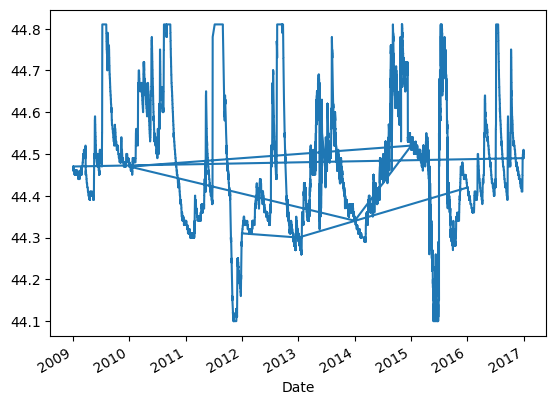

In [24]:
df_iqr_level = df[(df['level'] < upper_level) & (df['level'] > lower_level)]
df_iqr_level['level'].plot( )

In [25]:
#사분위수와 IQR 구하기
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)
iqr_temp = q3_temp-q1_temp
print('IQR:', iqr_temp)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp - iqr_temp * 1.5
print(upper_temp, '/', lower_temp)
print((df['temp'] > upper_temp).sum( ))
print((df['temp'] < lower_temp).sum( ))

IQR: 0.10000000000000142
16.450000000000003 / 16.049999999999997
227
15


In [26]:
#사분위수와 IQR 구하기
q3_ec = df['EC'].quantile(q=0.75)
q1_ec = df['EC'].quantile(q=0.25)
iqr_ec = q3_ec - q1_ec
print('IQR:', iqr_ec)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_ec = q3_ec + iqr_ec * 1.5
lower_ec = q1_ec - iqr_ec * 1.5
print(upper_ec, '/', lower_ec)
print((df['EC'] > upper_ec).sum( ))
print((df['EC'] < lower_ec).sum( ))

IQR: 20.0
772.0 / 692.0
831
788


In [28]:
df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp) &\
(df['level'] < upper_level) & (df['level'] > lower_level) &\
(df['EC'] < upper_ec) & (df['EC'] > lower_ec)]
df_iqr.describe( )

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


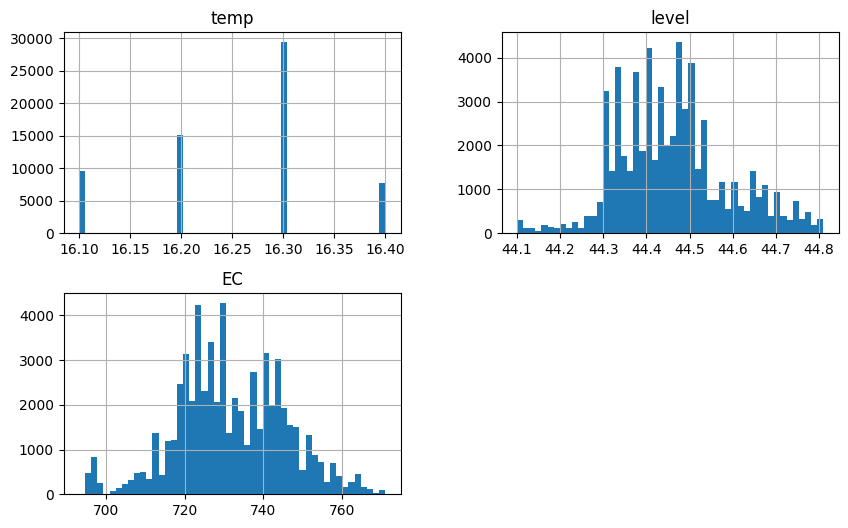

In [29]:
df_iqr.hist(bins=50, figsize=(10,6))
plt.show( )

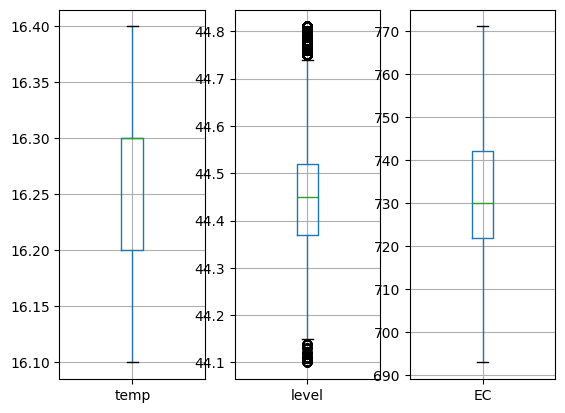

In [30]:
plt.subplot(1, 3, 1)
df_iqr.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df_iqr.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column='EC', return_type='both')
plt.show( )

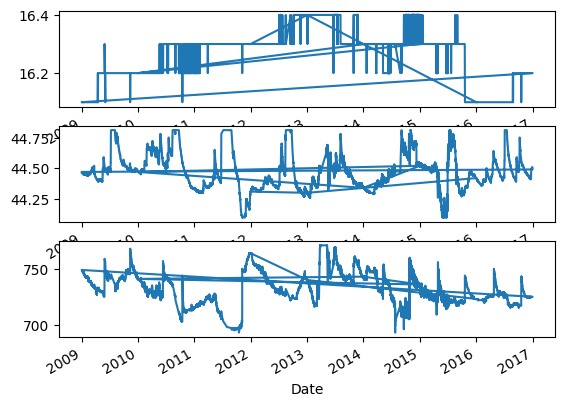

In [31]:
plt.subplot(3, 1, 1)
df_iqr['temp'].plot( )
plt.subplot(3, 1, 2)
df_iqr['level'].plot( )
plt.subplot(3, 1, 3)
df_iqr['EC'].plot( )
plt.show( )

In [32]:
df_iqr.to_csv('대전지하수_정제.csv', encoding='cp949')

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./대전지하수_정제.csv')
df.head( )

,Date,temp,level,EC
0,2012-01-01 00:00:00,16.3,44.31,764
1,2012-01-01 01:00:00,16.3,44.31,764
2,2012-01-01 02:00:00,16.3,44.31,764
3,2012-01-01 03:00:00,16.3,44.31,764
4,2012-01-01 04:00:00,16.3,44.31,764


In [34]:
df = df[['level', 'EC']]
df.describe( )

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


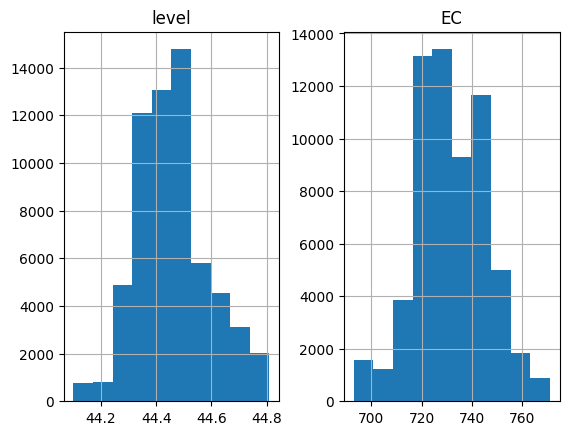

In [35]:
df.hist( )
plt.show( )

In [36]:
df1 = df.copy( )
df1.head(3)

,level,EC
0,44.31,764
1,44.31,764
2,44.31,764


In [37]:
df1['level_z_score'] = (df1['level'] - df1['level'].mean( )) / df1['level'].std( )
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std( )
df1.head(3)

,level,EC,level_z_score,EC_z_score
0,44.31,764,-1.167204,2.326702
1,44.31,764,-1.167204,2.326702
2,44.31,764,-1.167204,2.326702


In [38]:
df1.describe( )

,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,44.459701,731.698612,-4.212633e-14,-2.081947e-15
std,0.128256,13.882905,1.000000e+00,1.000000e+00
min,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,44.520000,742.000000,4.701450e-01,7.420196e-01
max,44.810000,771.000000,2.731246e+00,2.830920e+00


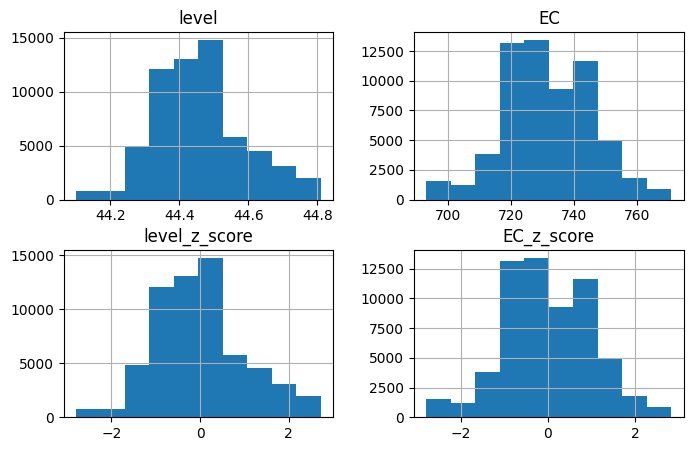

In [39]:
df1.hist(figsize=(8,5))
plt.show( )

In [40]:
df2 = df.copy( )
df2_standard = (df2-df2.mean( )) / df2.std( )
df2_standard.head(3)

,level,EC
0,-1.167204,2.326702
1,-1.167204,2.326702
2,-1.167204,2.326702


In [41]:
df3 = df.copy( )
df3['level_minmax'] = (df3['level']-df3['level'].min()) / (df3['level'].max( )\
-df3['level'].min( ))
df3['EC_minmax'] = (df3['EC'] - df3['EC'].min( )) / (df3['EC'].max( ) -
df3['EC'].min( ))
df3.head(3)

,level,EC,level_minmax,EC_minmax
0,44.31,764,0.295775,0.910256
1,44.31,764,0.295775,0.910256
2,44.31,764,0.295775,0.910256


In [42]:
df3.describe( )

,level,EC,level_minmax,EC_minmax
count,61814.000000,61814.000000,61814.000000,61814.000000
mean,44.459701,731.698612,0.506621,0.496136
std,0.128256,13.882905,0.180642,0.177986
min,44.100000,693.000000,0.000000,0.000000
25%,44.370000,722.000000,0.380282,0.371795
50%,44.450000,730.000000,0.492958,0.474359
75%,44.520000,742.000000,0.591549,0.628205
max,44.810000,771.000000,1.000000,1.000000


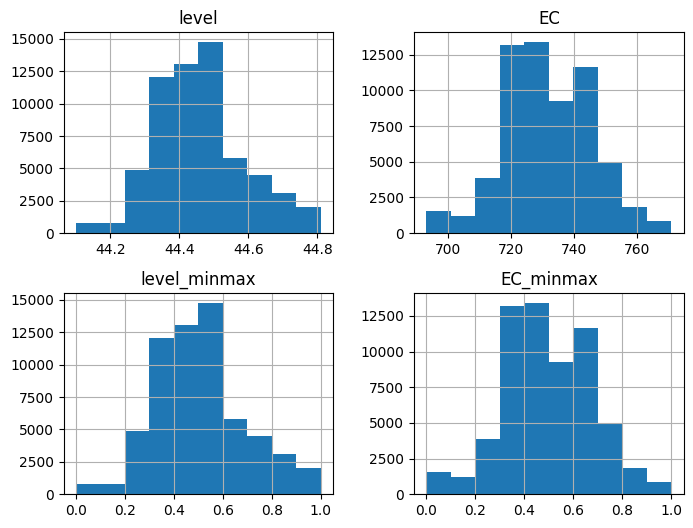

In [43]:
df3.hist(figsize=(8,6))
plt.show( )